<center> <h1>🐳 A Whale Portfolio analysis</h1> </center>

Evaluating the performance of algorithmic, hedge, and mutual fund portfolios and comparing them against the S&P 500 Index.

In [1]:
# Initial imports
import os
import requests
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

## Whale Returns of Soros, Paulson,Tiger and Berkshire
Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns 
whale_path = Path('./Resources/whale_returns.csv')
whale_returns = pd.read_csv(whale_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [3]:
# Count nulls .isnull()
whale_returns.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls .dropna()
whale_returns.dropna(inplace=True)

## Algorithmic 1 and Algorithmic 2 Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns 
algo_path = Path('./Resources/algo_returns.csv')
algo_returns = pd.read_csv(algo_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns.dropna(inplace = True)
algo_returns.columns = ['Algorithmic 1 ', 'Algorithmic 2']
algo_returns.head()

,Algorithmic 1,Algorithmic 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_path = Path('./Resources/sp500_history.csv')
sp500_df = pd.read_csv(sp500_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [9]:
# Check Data Types
print( f" {sp500_df['Close'][0]} {type(sp500_df['Close'][1])}")

 $2933.68 <class 'str'>


In [10]:
# Fix Data Types 
sp500_df2 = sp500_df['Close'].str.removeprefix("$").to_frame().astype(float)

In [11]:
# Calculate Daily Returns
sp500_returns = sp500_df2.pct_change()

In [12]:
# Drop nulls
sp500_returns.dropna(inplace=True)

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.columns =['sp500']

## Combined Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns. pd.concat()
combined_returns = pd.concat([whale_returns, algo_returns, sp500_returns] ,join='inner',axis=1)
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algorithmic 1,Algorithmic 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

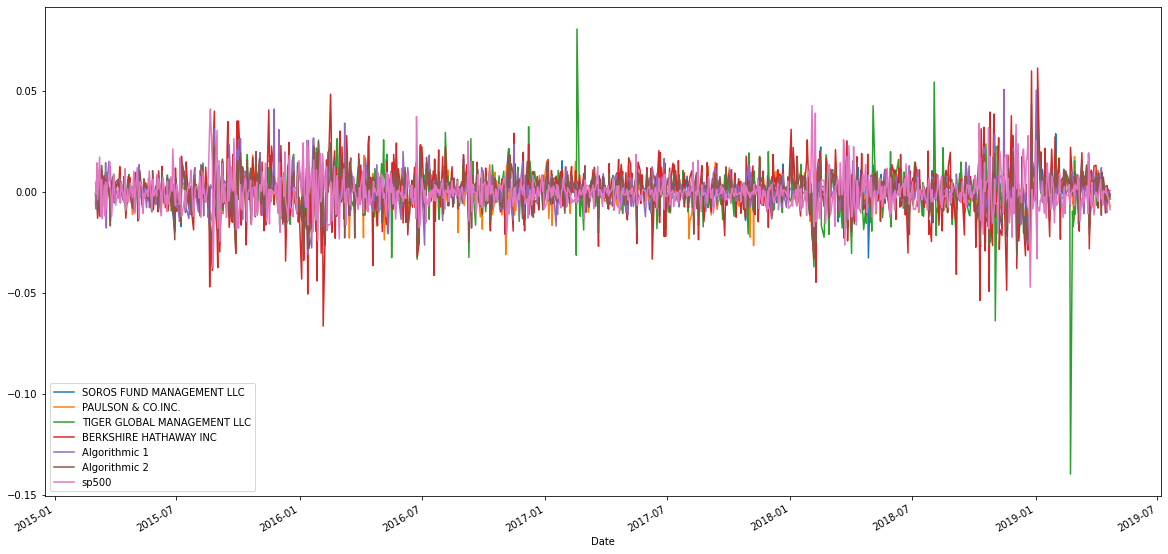

In [15]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize=(20,10))

## Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

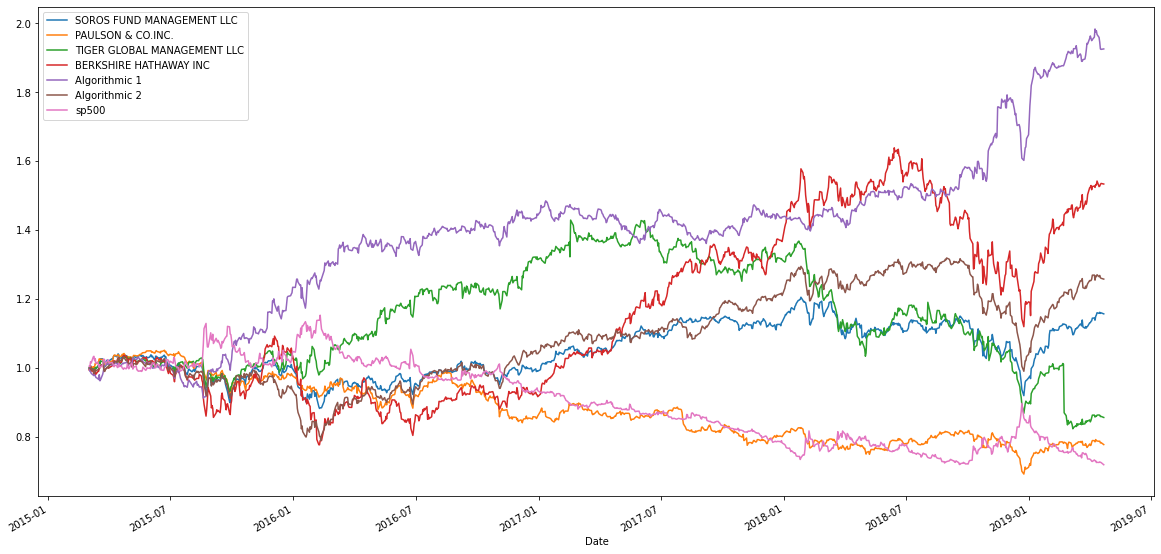

In [16]:
# Calculate cumulative returns of all portfolios
cumultive_returns = (1 + combined_returns).cumprod()
# Plot cumulative returns
cumultive_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

## Create a box plot for each portfolio


<AxesSubplot:>

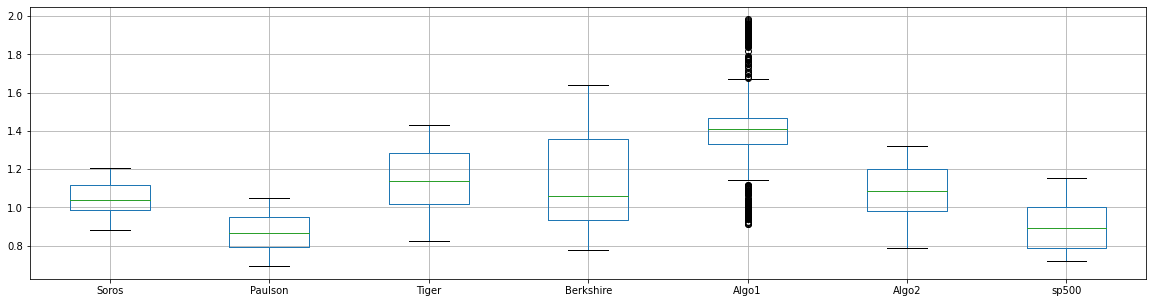

In [17]:
# Box plot to visually show risk
cumultive_returns.columns = ['Soros', 'Paulson', 'Tiger', 'Berkshire', 'Algo1', 'Algo2','sp500']
cumultive_returns.boxplot(figsize=(20,5))

## Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
cumultive_returns_std = cumultive_returns.std()

## Determine which portfolios are riskier than the S&P 500

In [19]:
# Determine which portfolios are riskier than the S&P 500
sp500 = cumultive_returns_std['sp500']
index = 0
for risk in cumultive_returns_std:
    if risk == sp500:
        print(f"{cumultive_returns_std.index[index]} Portfolio has as equal risk as S&P500")
    elif risk > sp500:
        print(f"{cumultive_returns_std.index[index]} Portfolio has more risk than S&P500")
    elif risk < sp500:
        print(f"{cumultive_returns_std.index[index]} Prtfolio has less risk than S&P500")
    else:
        print(f"{cumultive_returns_std.index[index]} Portfolio has no enough data to determine risk")
    index += 1

Soros Prtfolio has less risk than S&P500
Paulson Prtfolio has less risk than S&P500
Tiger Portfolio has more risk than S&P500
Berkshire Portfolio has more risk than S&P500
Algo1 Portfolio has more risk than S&P500
Algo2 Portfolio has more risk than S&P500
sp500 Portfolio has as equal risk as S&P500


## Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annulized_std = cumultive_returns_std * np.sqrt(252)
annulized_std

Soros        1.161806
Paulson      1.404053
Tiger        2.375658
Berkshire    3.831820
Algo1        3.679263
Algo2        2.089756
sp500        1.823124
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

<AxesSubplot:title={'center':'Rolling std for all portfolios with 21-day window'}, xlabel='Date'>

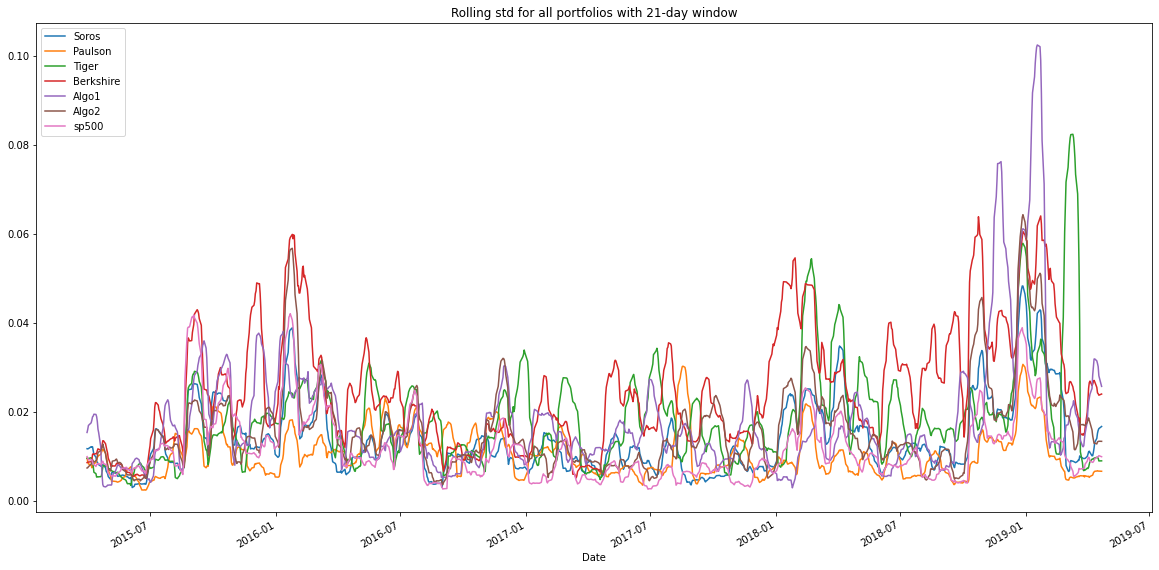

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = cumultive_returns.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std.plot(figsize=(20,10), title='Rolling std for all portfolios with 21-day window')

<AxesSubplot:title={'center':'Correlation for Newly Combined portfolios'}>

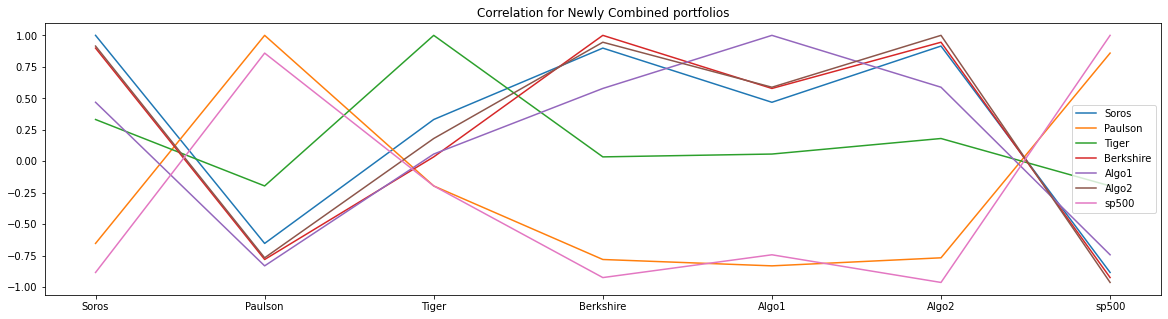

In [22]:
# Calculate the correlation
correlation_matrix = cumultive_returns.corr()

# Display de correlation matrix
correlation_matrix.plot(figsize=(20,5), title='Correlation for Newly Combined portfolios')

## Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Beta trend of Algo 1'}, xlabel='Date'>

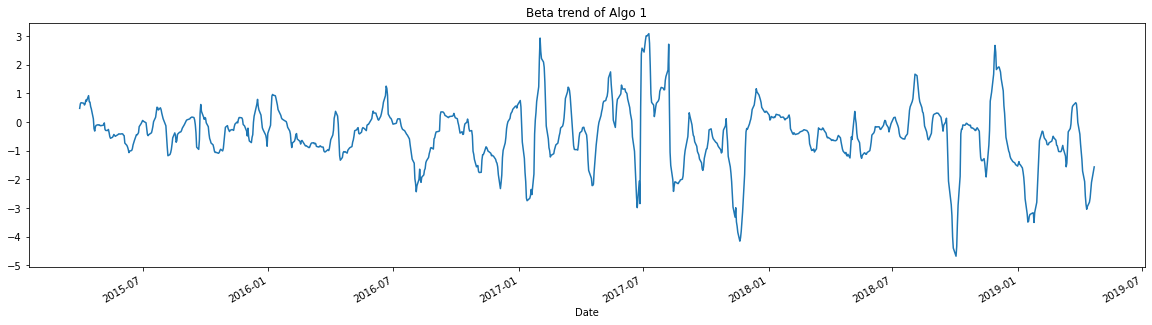

In [23]:
# Calculate covariance of a single portfolio
rolling_covariance_algo2 = cumultive_returns['Algo1'].rolling(window=21).cov(cumultive_returns['sp500'])

# Calculate variance of S&P 500
rolling_variance_SP500 = cumultive_returns['sp500'].rolling(window=21).var()

# Computing beta
algo2_beta = rolling_covariance_algo2 / rolling_variance_SP500

# Plot beta trend
algo2_beta.plot(figsize=(20,5), title='Beta trend of Algo 1')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [24]:
# Use `ewm` to calculate the rolling window
cumultive_returns_std.ewm(halflife=21).mean()

Soros        0.073187
Paulson      0.080943
Tiger        0.104606
Berkshire    0.140511
Algo1        0.159988
Algo2        0.154865
sp500        0.148567
dtype: float64

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

## Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
anulized_sharpe_ratio = ((cumultive_returns.mean() - cumultive_returns['sp500'].mean()) * 252)/(cumultive_returns.std()* np.sqrt(252))

<AxesSubplot:title={'center':'Annual Sharpe Ratios'}>

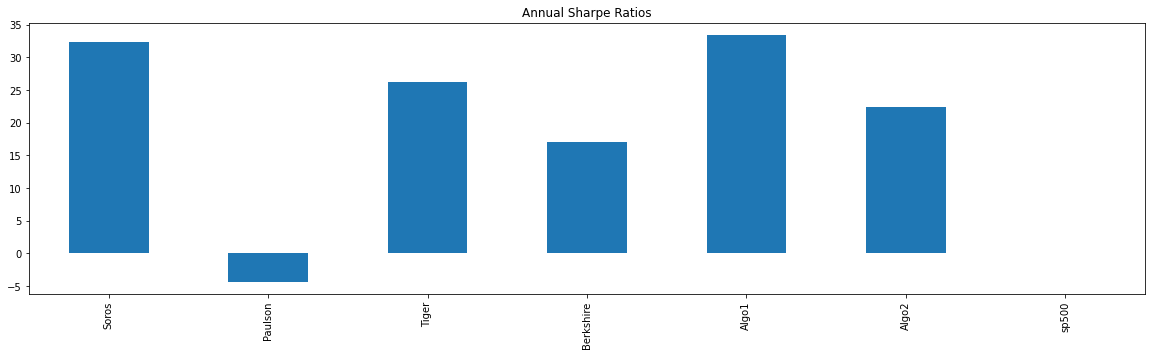

In [48]:
# Visualize the sharpe ratios as a bar plot
anulized_sharpe_ratio.plot(kind='bar',  title="Annual Sharpe Ratios", figsize=(20,5))

## Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [27]:
# Determine portfolio performance of Algo 2 in comparison to S&P 500
if anulized_sharpe_ratio['Algo1'] > anulized_sharpe_ratio['sp500']:
    print(f"Algo1 outperfomed S&P 500")
else:
    print(f"Algo1 underperfomed compared to S&P 500") 
    
# Determine portfolio performance of Algo 2 in comparison to S&P 500
if anulized_sharpe_ratio['Algo2'] > anulized_sharpe_ratio['sp500']:
    print(f"Algo2 outperfomed S&P 500")
else:
    print(f"Algo2 underperfomed compared to S&P 500")

Algo1 outperfomed S&P 500
Algo2 outperfomed S&P 500


In [28]:
# set variables
index=0
algo1_performance = anulized_sharpe_ratio['Algo1']

# Determine portfolio performance in comparison to Algo1
for performance in anulized_sharpe_ratio:
    if anulized_sharpe_ratio.index[index] == 'Algo1':
        continue
    if performance == algo1_performance:
        print(f"Algo1 equally performed compared to {combined_returns.columns[index]} portfolio")
    elif performance < algo1_performance:
        print(f"Algo1 outperfomed {combined_returns.columns[index]} portfolio")
    elif performance > algo1_performance:
        print(f"Algo1 underperformed compared to {combined_returns.columns[index]} portfolio")
    else:
        print(f"Sorry, you are not eligible to be compete with the whales.")
    index+=1

Algo1 outperfomed SOROS FUND MANAGEMENT LLC portfolio
Algo1 outperfomed PAULSON & CO.INC.  portfolio
Algo1 outperfomed TIGER GLOBAL MANAGEMENT LLC portfolio
Algo1 outperfomed BERKSHIRE HATHAWAY INC portfolio


In [29]:
# set variables
algo2_performance = anulized_sharpe_ratio['Algo2']   
index=0

# Determine portfolio performance in comparison to Algo2 
for performance in anulized_sharpe_ratio:
    if anulized_sharpe_ratio.index[index] == 'Algo2':
        continue
    if performance == algo2_performance:
        print(f"Algo2 equally performed compared to {combined_returns.columns[index]} portfolio")
    elif performance < algo2_performance:
        print(f"Algo2 outperfomed {combined_returns.columns[index]} portfolio")
    elif performance > algo2_performance:
        print(f"Algo2 underperformed compared to {combined_returns.columns[index]} portfolio")
    else:
        print(f"Sorry, you are not eligible to be compete with the whales.")
    index+=1

Algo2 underperformed compared to SOROS FUND MANAGEMENT LLC portfolio
Algo2 outperfomed PAULSON & CO.INC.  portfolio
Algo2 underperformed compared to TIGER GLOBAL MANAGEMENT LLC portfolio
Algo2 outperfomed BERKSHIRE HATHAWAY INC portfolio
Algo2 underperformed compared to Algorithmic 1  portfolio


---

## Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at least 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [30]:
# Reading data from 1st stock
goog_csv_path = Path("./custom_portfolio/GOOG.csv")
goog_df = pd.read_csv(goog_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [31]:
# Reading data from 2nd stock
tsla_csv_path = Path("./custom_portfolio/TSLA.csv")
tsla_df = pd.read_csv(tsla_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [32]:
# Reading data from 3rd stock
twtr_csv_path = Path("./custom_portfolio/TWTR.csv")
twtr_df = pd.read_csv(twtr_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [33]:
# Combine all stocks in a single DataFrame
my_stocks = pd.concat([goog_df.Close, tsla_df.Close, twtr_df.Close], axis="columns", join="inner")
my_stocks.columns = ['goog','tsla','twtr']
my_stocks.head()

,goog,tsla,twtr
Date,,,
2018-03-27,1005.10,279.18,28.07
2018-03-26,1053.21,304.18,31.91
2018-03-23,1021.57,301.54,31.03
2018-03-22,1049.08,309.10,31.20
2018-03-21,1090.88,316.53,32.73


In [34]:
# Reset Date index
my_stocks.sort_index(inplace=True)

In [35]:
# Reorganize portfolio data by having a column per symbol
my_stocks.head()

,goog,tsla,twtr
Date,,,
2014-03-27,558.46,207.32,46.32
2014-03-28,559.99,212.37,47.30
2014-03-31,556.97,208.45,46.67
2014-04-01,567.16,216.97,46.98
2014-04-02,567.00,230.29,45.73


In [36]:
# Calculate daily returns & Drop NAs

daily_returns = my_stocks.pct_change()
daily_returns.dropna(inplace = True)

# Display sample data
daily_returns.head()

,goog,tsla,twtr
Date,,,
2014-03-28,0.002740,0.024358,0.021157
2014-03-31,-0.005393,-0.018458,-0.013319
2014-04-01,0.018295,0.040873,0.006642
2014-04-02,-0.000282,0.061391,-0.026607
2014-04-03,0.004832,-0.021234,-0.036737


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

<AxesSubplot:title={'center':'Daily Returns for my porfolio'}, xlabel='Date'>

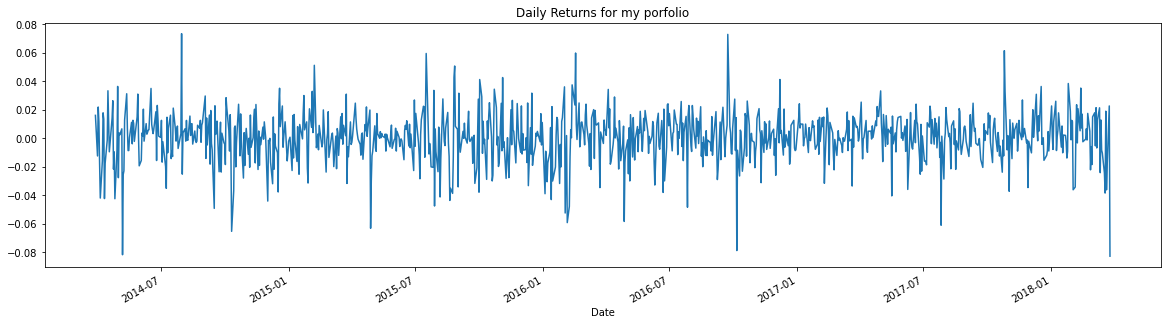

In [37]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_returns  = daily_returns.dot(weights)

# Display sample data
my_portfolio_returns.plot(figsize=(20,5), title= 'Daily Returns for my porfolio')

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [38]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns['my portfolio'] = my_portfolio_returns
# daily_returns = np.cumprod(1 + my_portfolio_returns)

In [39]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns.dropna(inplace = True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

## Calculate the Annualized Standard Deviation

In [40]:
# Calculate the annualized `std`
combined_returns_std = combined_returns.std()

annulized_std = combined_returns_std * np.sqrt(252)
annulized_std

SOROS FUND MANAGEMENT LLC      0.115779
PAULSON & CO.INC.              0.109682
TIGER GLOBAL MANAGEMENT LLC    0.148106
BERKSHIRE HATHAWAY INC         0.192791
Algorithmic 1                  0.117826
Algorithmic 2                  0.131383
sp500                          0.130398
my portfolio                   0.270305
dtype: float64

## Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day standard deviation'}, xlabel='Date'>

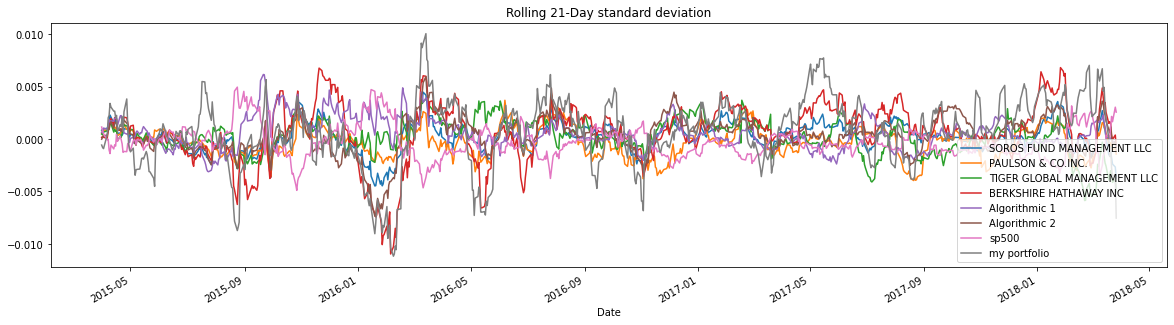

In [41]:
# Calculate rolling standard deviation
combined_rolling_std = combined_returns.rolling(window=21).mean()

# Plot rolling standard deviation
combined_rolling_std.plot(figsize=(20,5), title='Rolling 21-Day standard deviation')

## Calculate and plot the correlation

<AxesSubplot:title={'center':'Correlation for Newly Combined portfolios'}>

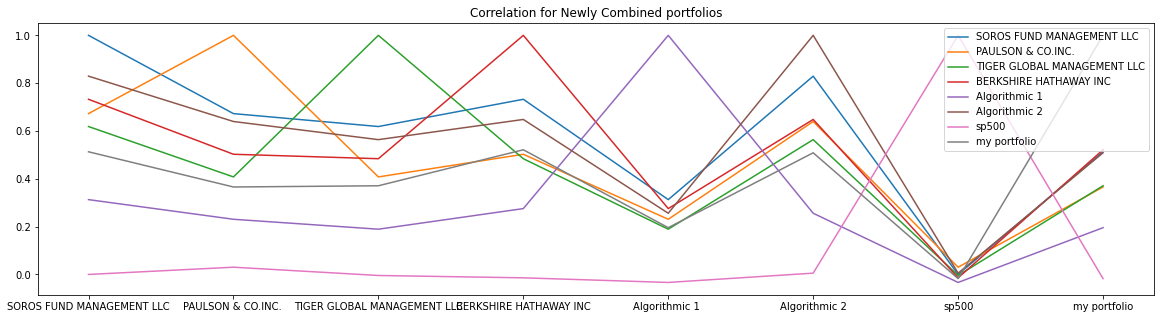

In [42]:
# Calculate and plot the correlation
new_correlation = combined_returns.corr()
new_correlation.plot(figsize=(20,5), title='Correlation for Newly Combined portfolios')

## Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling Beta of my portfolio compared to S&P 500'}, xlabel='Date'>

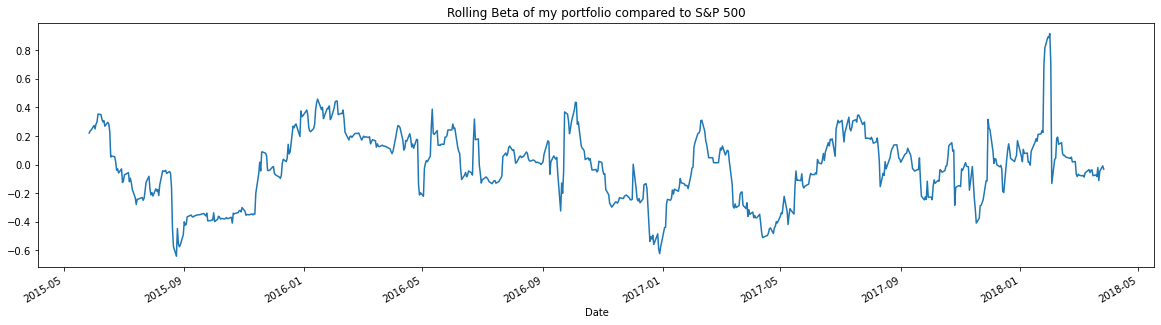

In [43]:
# Calculate and plot Beta
new_covariance = combined_returns['my portfolio'].rolling(window=60).cov(combined_returns['sp500'])
new_variance = combined_returns['sp500'].rolling(window=60).var()

rolling_beta = new_covariance / new_variance
rolling_beta.plot(figsize=(20, 5), title='Rolling Beta of my portfolio compared to S&P 500')

## Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [44]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio = ((combined_returns.mean()-combined_returns['sp500'].mean()) * 252) / (combined_returns.std() * np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe ratio'}>

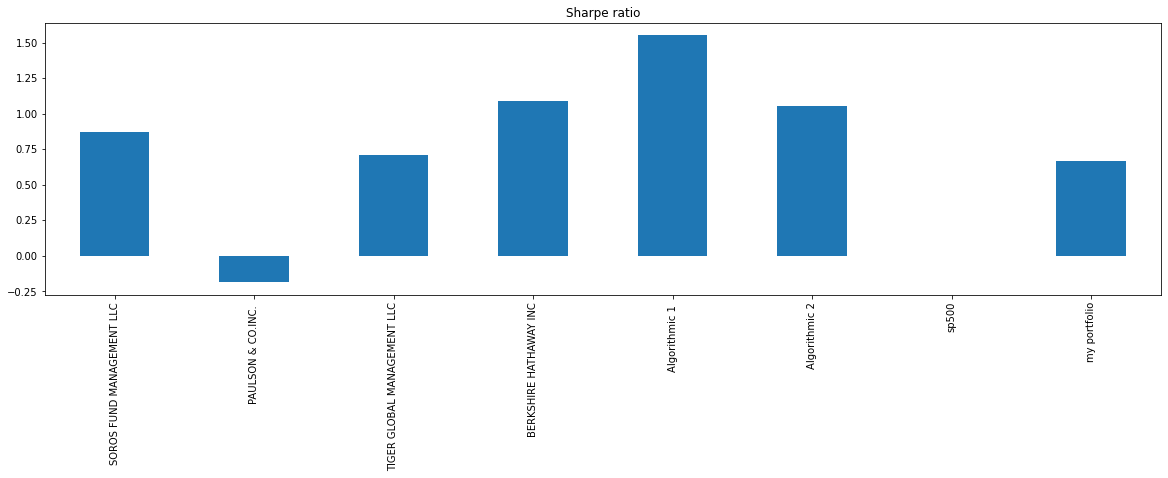

In [47]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar', title='Sharpe ratio',figsize=(20,5))

## How does your portfolio do?

In [46]:
# Set variables
index=0
my_performance = sharpe_ratio['my portfolio']

# Determine portfolio performance in comparison to Algo1
for performance in sharpe_ratio:
    if sharpe_ratio.index[index] == 'my portfolio':
        continue
    if performance == my_performance:
        print(f"My portfolio equally performed compared to {combined_returns.columns[index]} portfolio")
    elif performance < my_performance:
        print(f"My portfolio outperfomed {combined_returns.columns[index]} portfolio")
    elif performance > my_performance:
        print(f"My portfolio underperformed compared to {combined_returns.columns[index]} portfolio")
    else:
        print(f"Sorry, you are not eligible to be compete with the whales.")
    index+=1

My portfolio underperformed compared to SOROS FUND MANAGEMENT LLC portfolio
My portfolio outperfomed PAULSON & CO.INC.  portfolio
My portfolio underperformed compared to TIGER GLOBAL MANAGEMENT LLC portfolio
My portfolio underperformed compared to BERKSHIRE HATHAWAY INC portfolio
My portfolio underperformed compared to Algorithmic 1  portfolio
My portfolio underperformed compared to Algorithmic 2 portfolio
My portfolio outperfomed sp500 portfolio
